In [1]:
!pip3 install numpy
!pip3 install matplotlib
!pip3 install pandas
!pip3 install seaborn
!pip3 install scikit-learn
!pip3 install ace_tools
!pip3 install openpyxl

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [5]:
file_path = 'Coffee Shop Sales.xlsx'
df = pd.read_excel(file_path, sheet_name='Transactions')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [7]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [8]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [9]:
df.columns.unique()

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

## Store Analysis

In [10]:
# Calculate total revenue per transaction
df['transaction_revenue'] = df['transaction_qty'] * df['unit_price']

# Aggregate revenue by store
store_revenue = df.groupby(['store_id', 'store_location']).agg({
    'transaction_revenue': 'sum',
    'transaction_id': 'nunique',
    'transaction_qty': 'sum'
}).reset_index()

# Rename columns for clarity
store_revenue.rename(columns={
    'transaction_revenue': 'total_revenue',
    'transaction_id': 'total_transactions',
    'transaction_qty': 'total_quantity'
}, inplace=True)

# Calculate average revenue per transaction
store_revenue['avg_revenue_per_transaction'] = store_revenue['total_revenue'] / store_revenue['total_transactions']

# Sort stores by total revenue
top_stores = store_revenue.sort_values(by='total_revenue', ascending=False)

# Identify top-performing stores
print("Top Performing Stores by Revenue:")
print(top_stores)

Top Performing Stores by Revenue:
   store_id   store_location  total_revenue  total_transactions  \
2         8   Hell's Kitchen      236511.17               50735   
0         3          Astoria      232243.91               50599   
1         5  Lower Manhattan      230057.25               47782   

   total_quantity  avg_revenue_per_transaction  
2           71737                     4.661696  
0           70991                     4.589891  
1           71742                     4.814726  


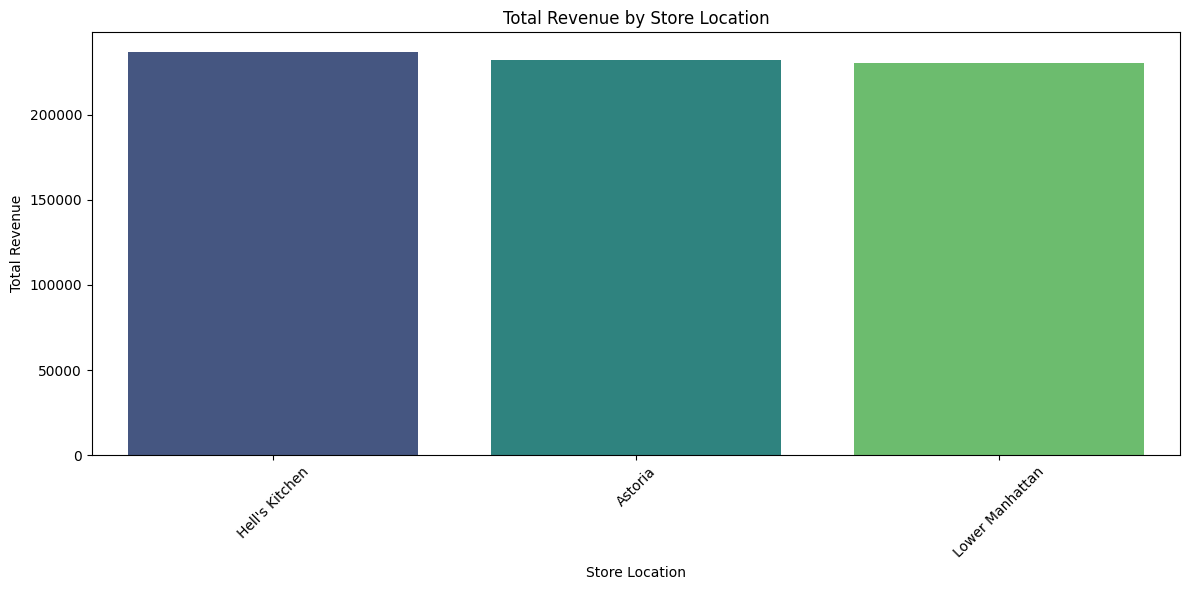

In [11]:
# Plotting highest revenue earning store
plt.figure(figsize=(12, 6))
sns.barplot(x='store_location', y='total_revenue', data=top_stores, palette='viridis')
plt.title('Total Revenue by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Product Sales and Pricing Optimization

In [12]:
# Aggregate revenue and quantity by product category and type
product_performance = df.groupby(['product_category', 'product_type']).agg({
    'transaction_revenue': 'sum',
    'transaction_qty': 'sum',
    'transaction_id': 'nunique'
}).reset_index()

# Calculate average revenue per transaction for products
product_performance['avg_revenue_per_transaction'] = product_performance['transaction_revenue'] / product_performance['transaction_id']

# Display top-performing products by revenue and volume
top_product_revenue = product_performance.sort_values(by='transaction_revenue', ascending=False).head(1)
top_product_volume = product_performance.sort_values(by='transaction_qty', ascending=False).head(1)

print("Product Category and Type contributing most to Revenue:")
print(top_product_revenue[['product_category', 'product_type', 'transaction_revenue']])

print("Product Category and Type contributing most to Sales Volume:")
print(top_product_volume[['product_category', 'product_type', 'transaction_qty']])

Product Category and Type contributing most to Revenue:
  product_category      product_type  transaction_revenue
5           Coffee  Barista Espresso              91406.2
Product Category and Type contributing most to Sales Volume:
   product_category     product_type  transaction_qty
26              Tea  Brewed Chai tea            26250


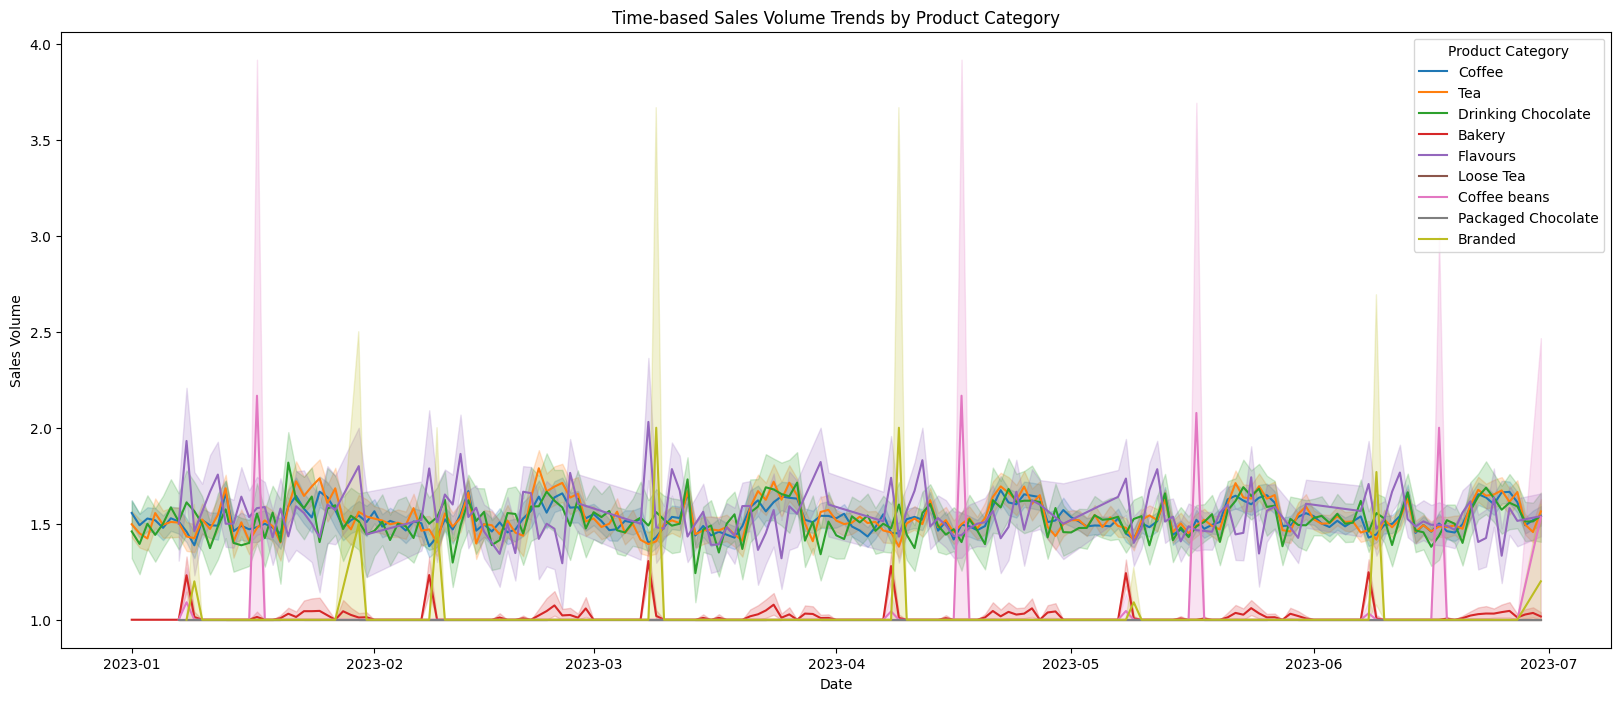

In [15]:
# --- Time-based Sales Trends ---
# Convert transaction_date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Extract month and day for analysis
df['month'] = df['transaction_date'].dt.to_period('M')
df['day_of_week'] = df['transaction_date'].dt.day_name()

# Time-based sales trends - Volume
plt.figure(figsize=(20, 8))
sns.lineplot(data=df, x='transaction_date', y='transaction_qty', hue='product_category')
plt.title('Time-based Sales Volume Trends by Product Category')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.legend(title='Product Category')
#plt.tight_layout()
plt.show()

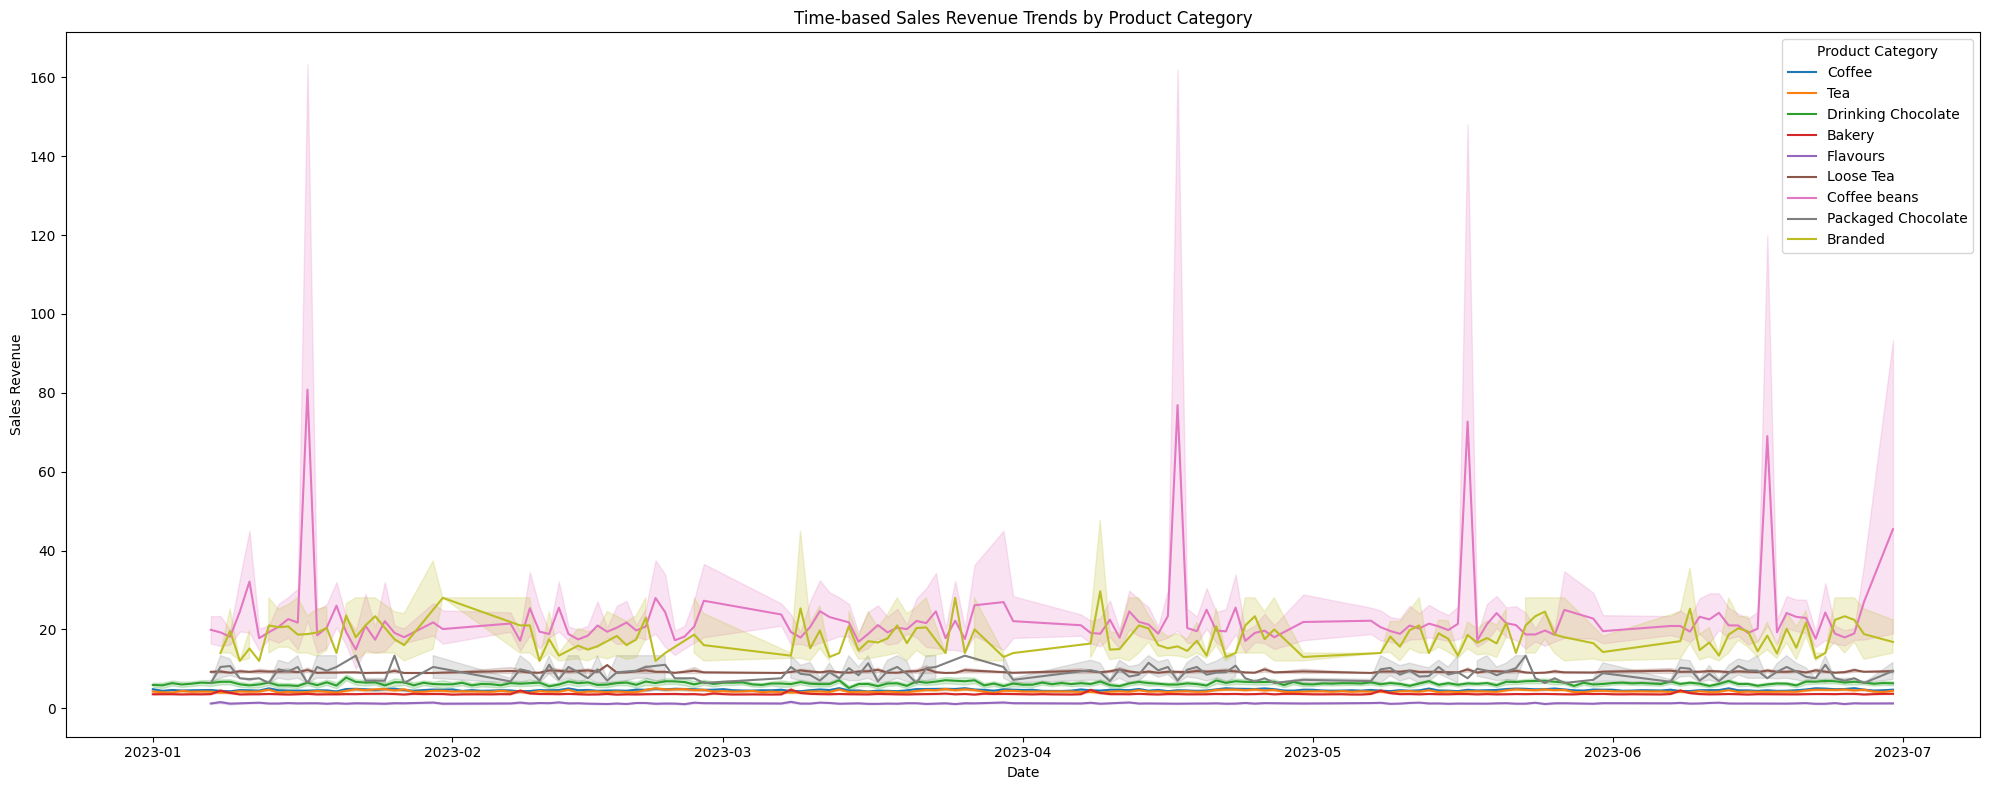

In [16]:
# Time-based sales trends - Revenue
plt.figure(figsize=(20, 8))
sns.lineplot(data=df, x='transaction_date', y='transaction_revenue', hue='product_category')
plt.title('Time-based Sales Revenue Trends by Product Category')
plt.xlabel('Date')
plt.ylabel('Sales Revenue')
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

In [17]:
# --- Average Sales per Transaction by Product Category ---
avg_sales_per_category = df.groupby('product_category').agg({
    'transaction_revenue': 'sum',
    'transaction_qty': 'sum',
    'transaction_id': 'nunique'
}).reset_index()
avg_sales_per_category['avg_revenue_per_transaction'] = avg_sales_per_category['transaction_revenue'] / avg_sales_per_category['transaction_id']
avg_sales_per_category['avg_qty_per_transaction'] = avg_sales_per_category['transaction_qty'] / avg_sales_per_category['transaction_id']

print("Average Sales per Transaction by Product Category:")
print(avg_sales_per_category[['product_category', 'avg_revenue_per_transaction', 'avg_qty_per_transaction']])

Average Sales per Transaction by Product Category:
     product_category  avg_revenue_per_transaction  avg_qty_per_transaction
0              Bakery                     3.610969                 1.018337
1             Branded                    18.215529                 1.038822
2              Coffee                     4.621207                 1.527835
3        Coffee beans                    22.866657                 1.042784
4  Drinking Chocolate                     6.314615                 1.522236
5            Flavours                     1.238409                 1.548012
6           Loose Tea                     9.267438                 1.000000
7  Packaged Chocolate                     9.050595                 1.000000
8                 Tea                     4.321458                 1.534401


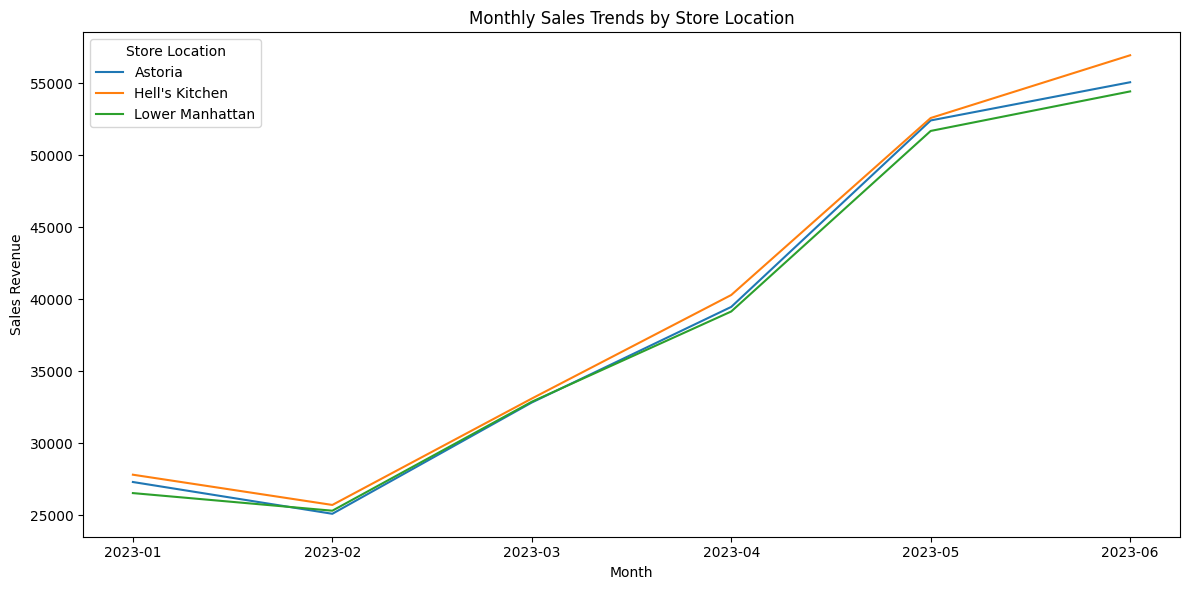

In [21]:
# --- Monthly Sales Trends for Different Stores and Overall ---
monthly_sales_store = df.groupby(['month', 'store_location']).agg({
    'transaction_revenue': 'sum'
}).reset_index()

monthly_sales_store['month'] = monthly_sales_store['month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_store, x='month', y='transaction_revenue', hue='store_location')
plt.title('Monthly Sales Trends by Store Location')
plt.xlabel('Month')
plt.ylabel('Sales Revenue')
plt.legend(title='Store Location')
plt.tight_layout()
plt.show()

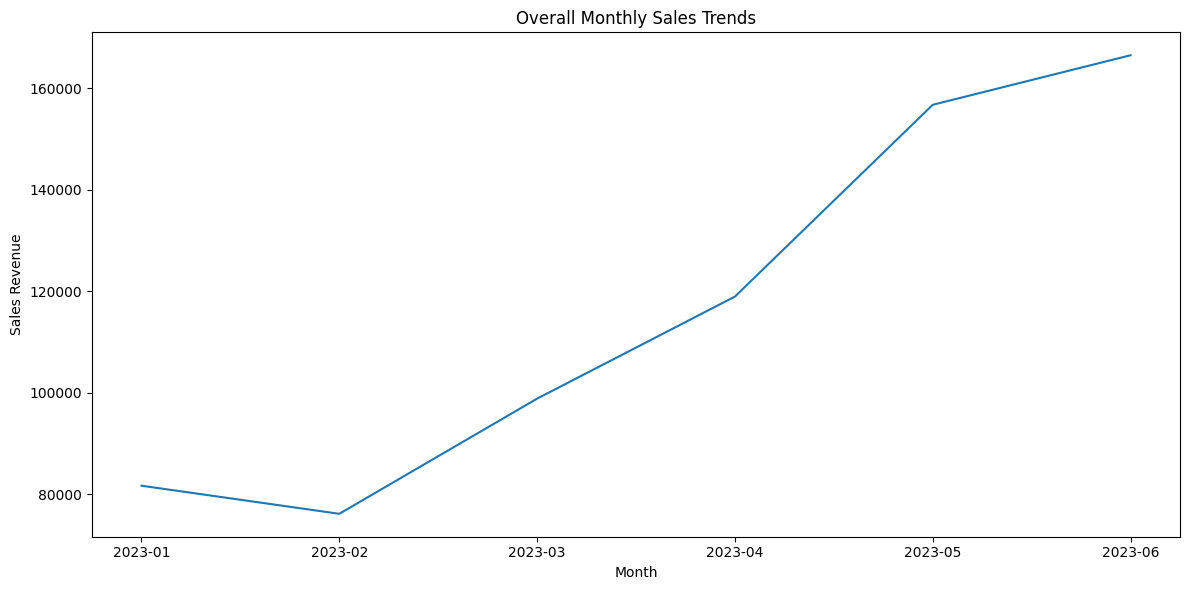

In [23]:
# Overall Monthly Sales Trends
overall_monthly_sales = df.groupby('month').agg({
    'transaction_revenue': 'sum'
}).reset_index()

overall_monthly_sales['month'] = overall_monthly_sales['month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=overall_monthly_sales, x='month', y='transaction_revenue')
plt.title('Overall Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales Revenue')
plt.tight_layout()
plt.show()

In [24]:
# --- Average Sales per Transaction ---
avg_sales_per_transaction = df.groupby('product_type').agg({
    'transaction_revenue': 'sum',
    'transaction_id': 'nunique',
    'transaction_qty': 'sum'
}).reset_index()
avg_sales_per_transaction['avg_revenue'] = avg_sales_per_transaction['transaction_revenue'] / avg_sales_per_transaction['transaction_id']
avg_sales_per_transaction['avg_quantity'] = avg_sales_per_transaction['transaction_qty'] / avg_sales_per_transaction['transaction_id']
print("Average Sales per Transaction:")
print(avg_sales_per_transaction)

Average Sales per Transaction:
             product_type  transaction_revenue  transaction_id  \
0        Barista Espresso             91406.20           16403   
1                Biscotti             19793.53            5711   
2               Black tea              2711.85             303   
3        Brewed Black tea             47932.00           11350   
4         Brewed Chai tea             77081.95           17183   
5        Brewed Green tea             23852.50            5671   
6       Brewed herbal tea             47539.50           11245   
7                Chai tea              4301.25             443   
8                Clothing              6163.00             221   
9      Drinking Chocolate              2728.04             266   
10            Drip coffee             31984.00            8477   
11         Espresso Beans              5560.25             319   
12          Gourmet Beans              6798.00             366   
13  Gourmet brewed coffee             70034.6

In [28]:
df['transaction_date'] = df['transaction_date'].astype(str)
df['transaction_time'] = df['transaction_time'].astype(str)

## Inventory & Operational Efficiency

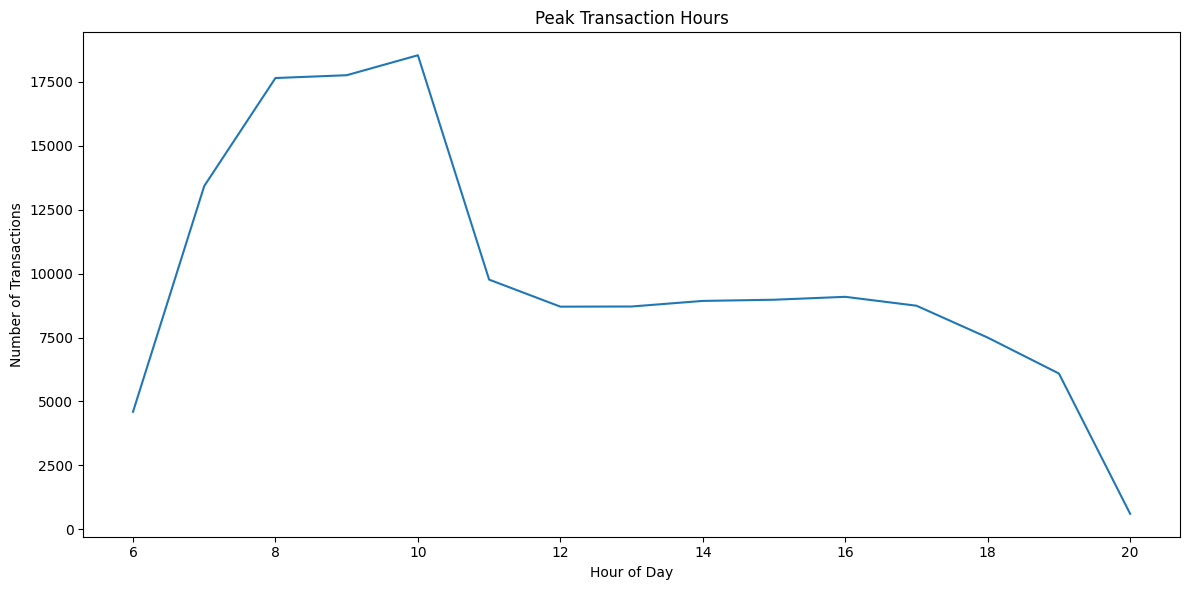

In [ ]:
# Convert transaction_date and transaction_time to datetime
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'] + ' ' + df['transaction_time'])
df['hour'] = df['transaction_datetime'].dt.hour
df['day_of_week'] = df['transaction_datetime'].dt.day_name()

# Peak transaction hours
hourly_sales = df.groupby('hour').agg({'transaction_id': 'nunique', 'transaction_revenue': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_sales, x='hour', y='transaction_id')
plt.title('Peak Transaction Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

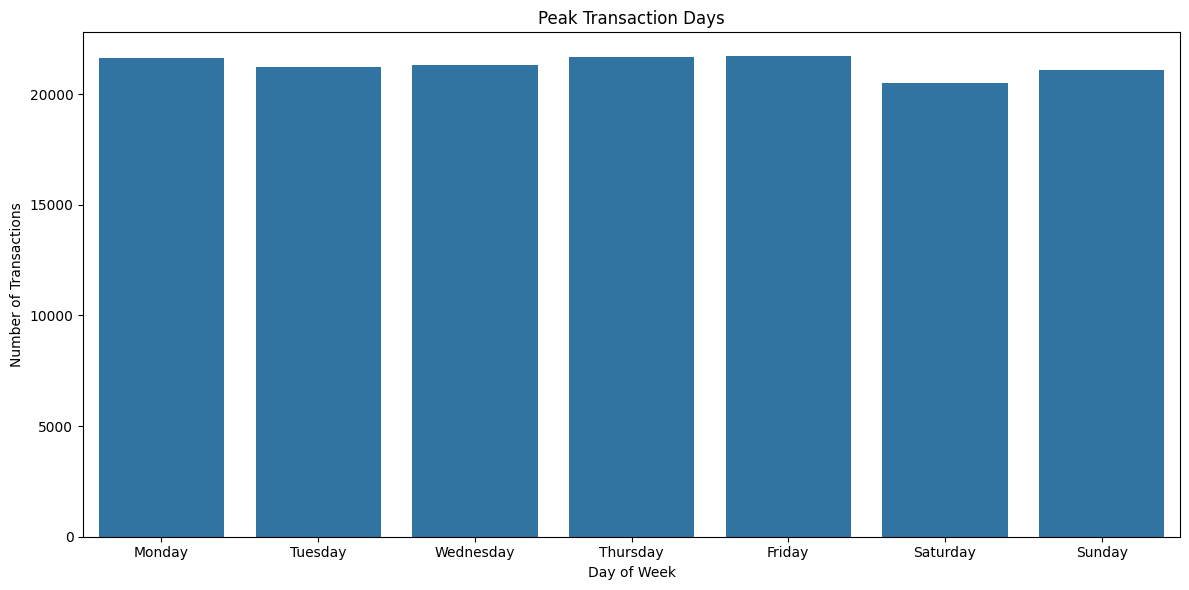

In [31]:
# Peak transaction days
daily_sales = df.groupby('day_of_week').agg({'transaction_id': 'nunique', 'transaction_revenue': 'sum'}).reset_index()
daily_sales['day_of_week'] = pd.Categorical(daily_sales['day_of_week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
daily_sales = daily_sales.sort_values('day_of_week')

plt.figure(figsize=(12, 6))
sns.barplot(data=daily_sales, x='day_of_week', y='transaction_id')
plt.title('Peak Transaction Days')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

## Basket & Cross-Selling Opportunities

Total baskets with more than one product: 24559
Top 10 Frequently Bought Together Products (Different Types):
                                 Product Pair  Count
25           Barista Espresso & Regular syrup  21092
26                   Barista Espresso & Scone  10942
255             Gourmet brewed coffee & Scone   8896
119                   Brewed Chai tea & Scone   8718
27        Barista Espresso & Sugar free syrup   7255
105   Brewed Chai tea & Gourmet brewed coffee   6739
3          Barista Espresso & Brewed Chai tea   6594
115                  Brewed Chai tea & Pastry   6452
12   Barista Espresso & Gourmet brewed coffee   6037
95                   Brewed Black tea & Scone   5990


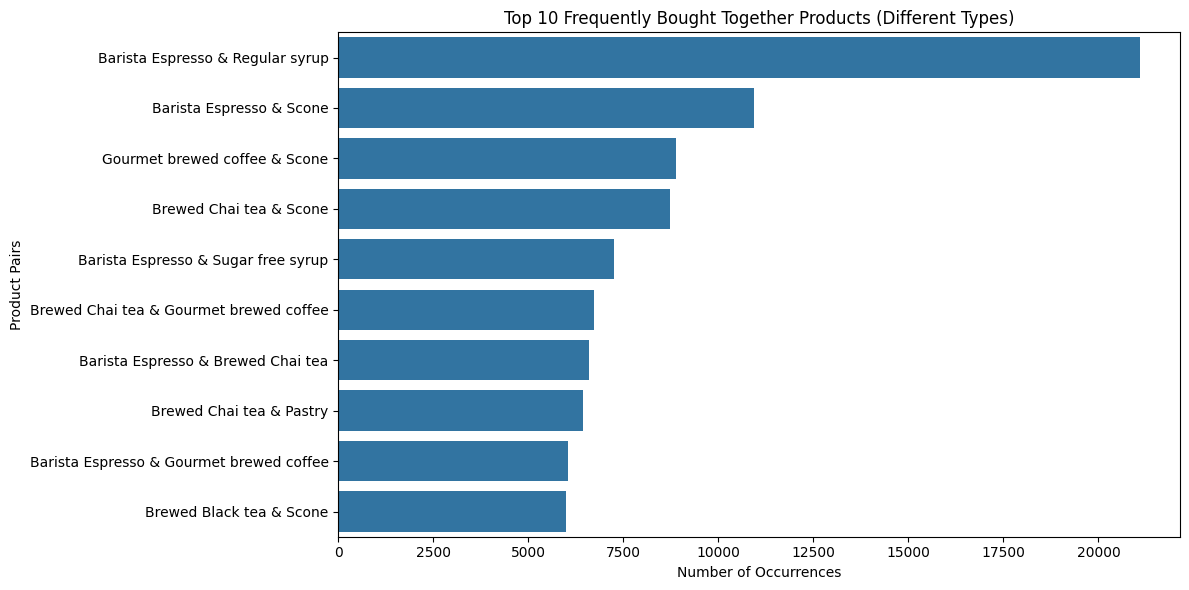

In [37]:
# Group by transaction_time to create baskets
baskets = df.groupby('transaction_time')['product_type'].apply(list)

# Filter out baskets with only one product
filtered_baskets = baskets[baskets.apply(lambda x: len(x) > 1)]

# Debug: Check the number of valid baskets
print(f"Total baskets with more than one product: {filtered_baskets.shape[0]}")

# Generate combinations of different products bought together
combination_list = []
for products in filtered_baskets:
    # Create combinations and exclude same product_type pairs
    unique_combos = [tuple(sorted(pair)) for pair in combinations(products, 2) if pair[0] != pair[1]]
    combination_list.extend(unique_combos)

# Count frequency of each combination
combination_counts = Counter(combination_list)

# Convert to DataFrame for analysis
combo_df = pd.DataFrame(combination_counts.items(), columns=['Product Pair', 'Count']).sort_values(by='Count', ascending=False)

# Remove duplicate pairs (e.g., Tea & Scone vs Scone & Tea)
combo_df['Product Pair'] = combo_df['Product Pair'].apply(lambda x: ' & '.join(sorted(x)))
combo_df = combo_df.groupby('Product Pair').agg({'Count': 'sum'}).reset_index().sort_values(by='Count', ascending=False)

# Display top 10 frequently bought together products
print("Top 10 Frequently Bought Together Products (Different Types):")
print(combo_df.head(10))

# Plot top 10 frequently bought together products
if not combo_df.empty:
    top_combos = combo_df.head(10)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_combos['Count'], y=top_combos['Product Pair'])
    plt.title('Top 10 Frequently Bought Together Products (Different Types)')
    plt.xlabel('Number of Occurrences')
    plt.ylabel('Product Pairs')
    plt.tight_layout()
    plt.show()
else:
    print("No different product pairs found with the current grouping method.")